In [1]:
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
population = pd.read_csv("data/population.csv")
coffe_shop_df = pd.read_excel("data/coffee_shop_data.xlsx")


In [5]:
population.head(10)

,GEO_ID,NAME,POPGROUP,POPGROUP_TTL,HCT006001,HCT006001ERR,HCT006002,HCT006003,HCT006004,HCT006005,HCT006006,HCT006007,HCT006008
0,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
1,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5
2,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25
3,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96
4,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41
5,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2
6,8600000US90001,ZCTA5 90001,1,Total population,12971,NaN,1244,1786,1934,2387,2077,1453,2090
7,8600000US90002,ZCTA5 90002,1,Total population,11731,NaN,1548,1712,1692,1829,1690,1196,2064
8,8600000US90003,ZCTA5 90003,1,Total population,15642,NaN,2059,2308,2341,2642,2270,1551,2471
9,8600000US90004,ZCTA5 90004,1,Total population,22547,NaN,6252,6074,3754,3318,1705,773,671


In [6]:
coffe_shop_df.head(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175
5,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.2,Female,78753,5.31765
6,7,Java Jolt,58 Welch Terrace,Sacramento,California,94273,916-163-2426,4.9,Female,73380,4.79900
7,8,Cuppa Comfort,3582 Russell Drive,South Lake Tahoe,California,96154,530-505-6560,4.1,Male,88458,5.37290
8,9,Roast & Relax,5016 Anniversary Point,South Lake Tahoe,California,96154,530-400-9041,3.3,Male,88458,5.69490
9,10,Perk Palace,7 David Junction,Fresno,California,93726,559-323-2365,4.2,Female,80973,5.30665


In [8]:
# Chekc for data info - including data types and missing values
coffe_shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [9]:
# Check the number of rows/records and features/columns
coffe_shop_df.shape

(1000, 11)

In [10]:
population.shape

(1706, 13)

In [11]:
# Check the basic statistics of the data - average latte price and salary
coffe_shop_df.describe()

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


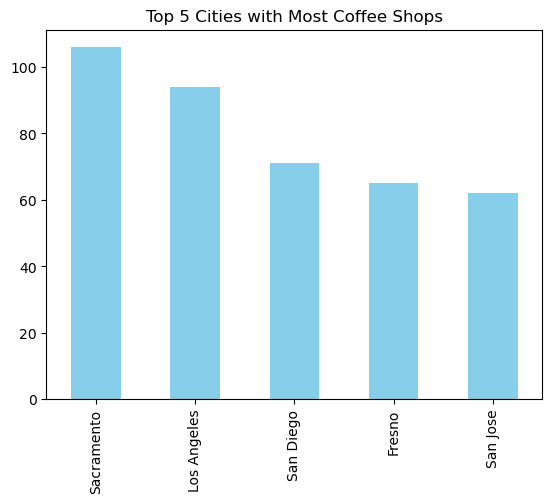

In [17]:
ax = coffe_shop_df["City"].value_counts().head(5).plot(kind="bar", color="skyblue")
ax.set_title("Top 5 Cities with Most Coffee Shops")
plt.show()

In [ ]:
ax = coffe_shop_df["Business Name"].value_counts().head(10).plot(kind="bar", color="skyblue")